# Pyfilaments exploratory data analysis notebook

In [280]:
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
plt.style.use('dark_background')
%matplotlib notebook

In [281]:
# Load data
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
folder, *rest = os.path.split(file)

print(folder)

filament = analysis.analysisTools(file = file)





/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
3
Loading Simulation data from disk ...
Time step: 9.99990000099999
No:of particles : 32
No:of time points : 100001
Root path:  /home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_00.hdf5


In [4]:
# Calculate the filament length vs time

filament.compute_arc_length()

<IPython.core.display.Javascript object>


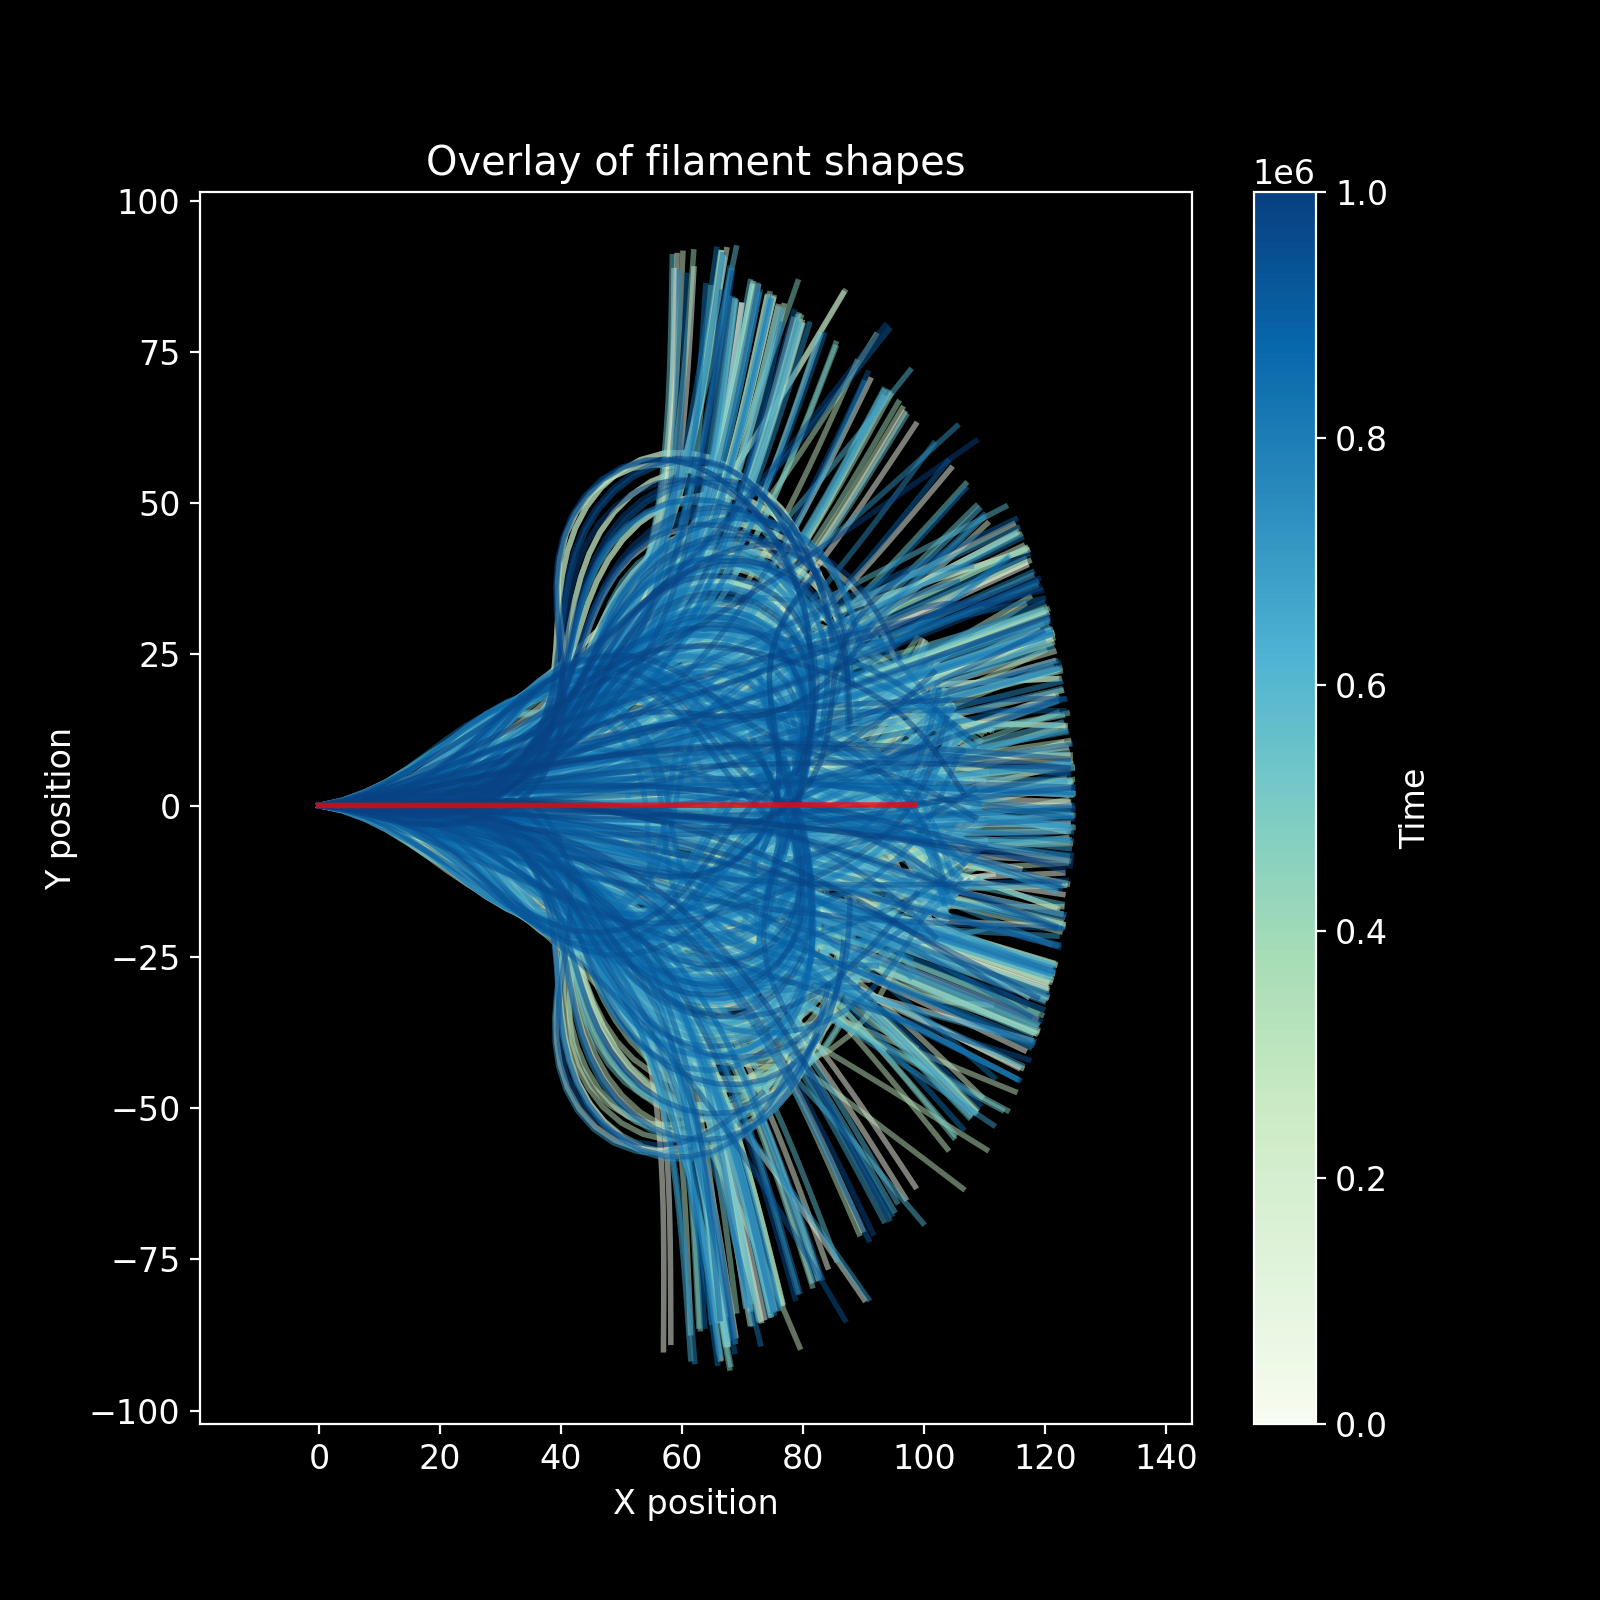

In [282]:
# Overlay of filament shapes
filament.plot_filament_centerlines(stride = 100, save = False, color_by = 'Time')

# Tip search-coverage and unique locations sampled


In [ ]:

filament.filament_tip_coverage(save = False)

filament.plot_unique_tip_locations(save = False)

filament.plot_timeseries(var = ['unique position count'])

# Unique positions sampled (prelim results)

- k = 30, Total unique positions sampled by tip: 257.0
- k = 40, Total unique positions sampled by tip: 211.0
- k = 50, Total unique positions sampled by tip: 436.0
- k = 70, Total unique positions sampled by tip: 1423.0
- k = 100, Total unique positions sampled by tip: 460.0

# Tangent angle representation

<IPython.core.display.Javascript object>


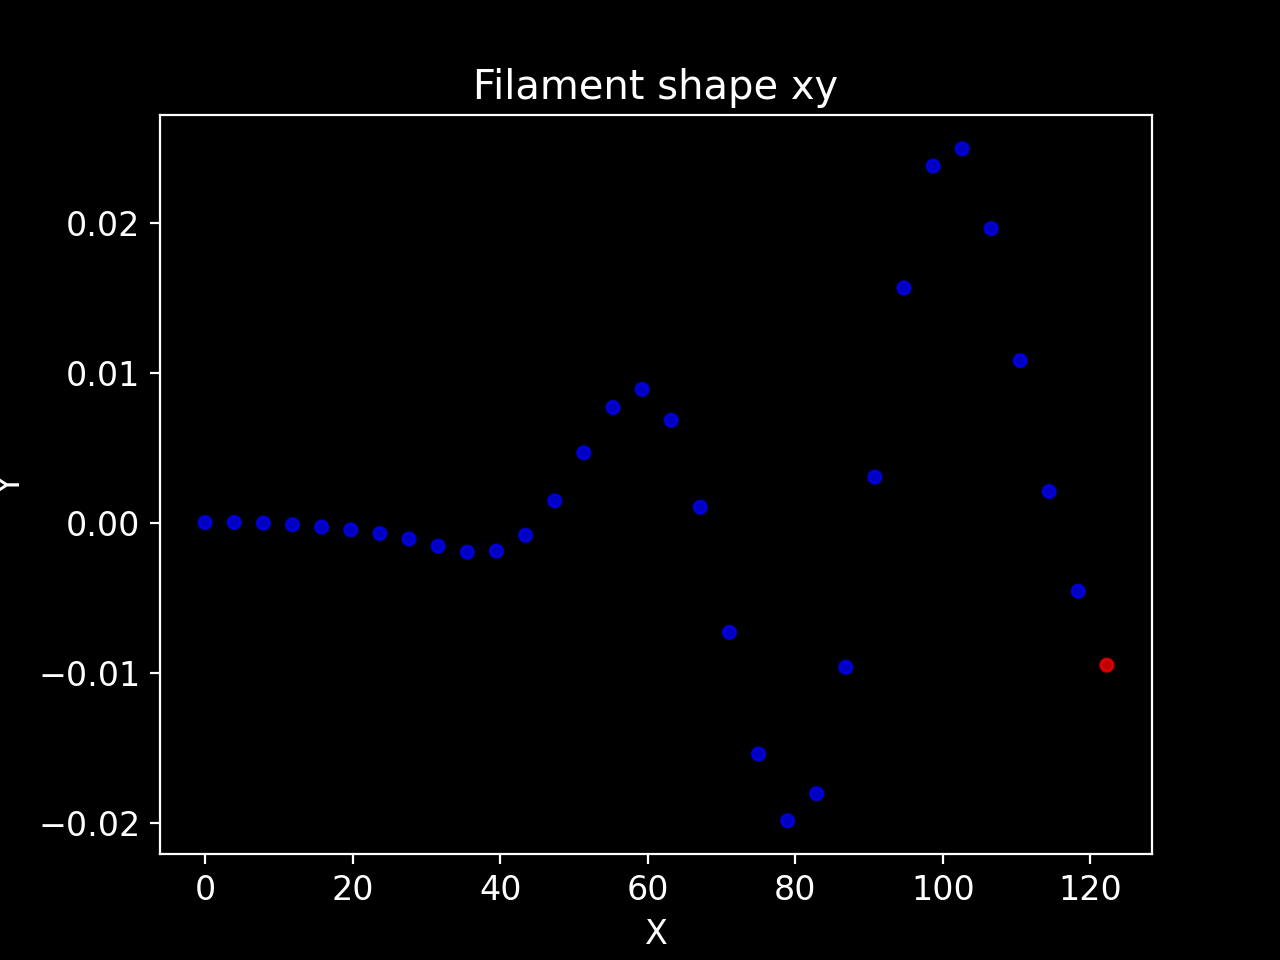

<IPython.core.display.Javascript object>


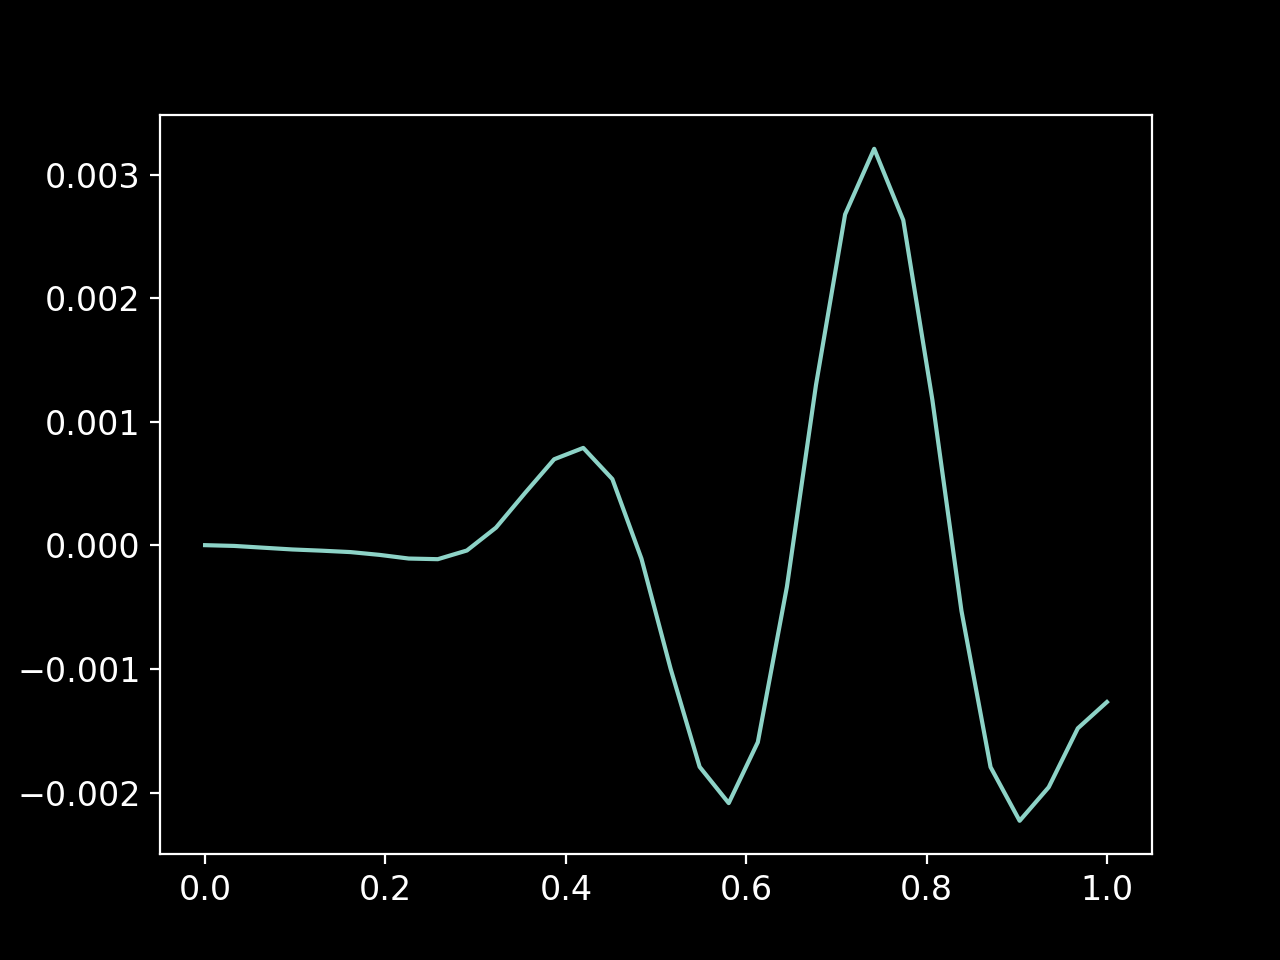

In [126]:
filament.r = filament.R[20, :]
filament.get_separation_vectors()
tangent_angles = filament.compute_tangent_angles()
arc_length_coordinate = np.linspace(0,1, filament.Np)


filament.plotFilament(r = filament.r)

plt.figure()
plt.plot(arc_length_coordinate, tangent_angles)
plt.show()

In [247]:
# Compute the tangent angle matrix
filament.compute_tangent_angle_matrix()

<IPython.core.display.Javascript object>


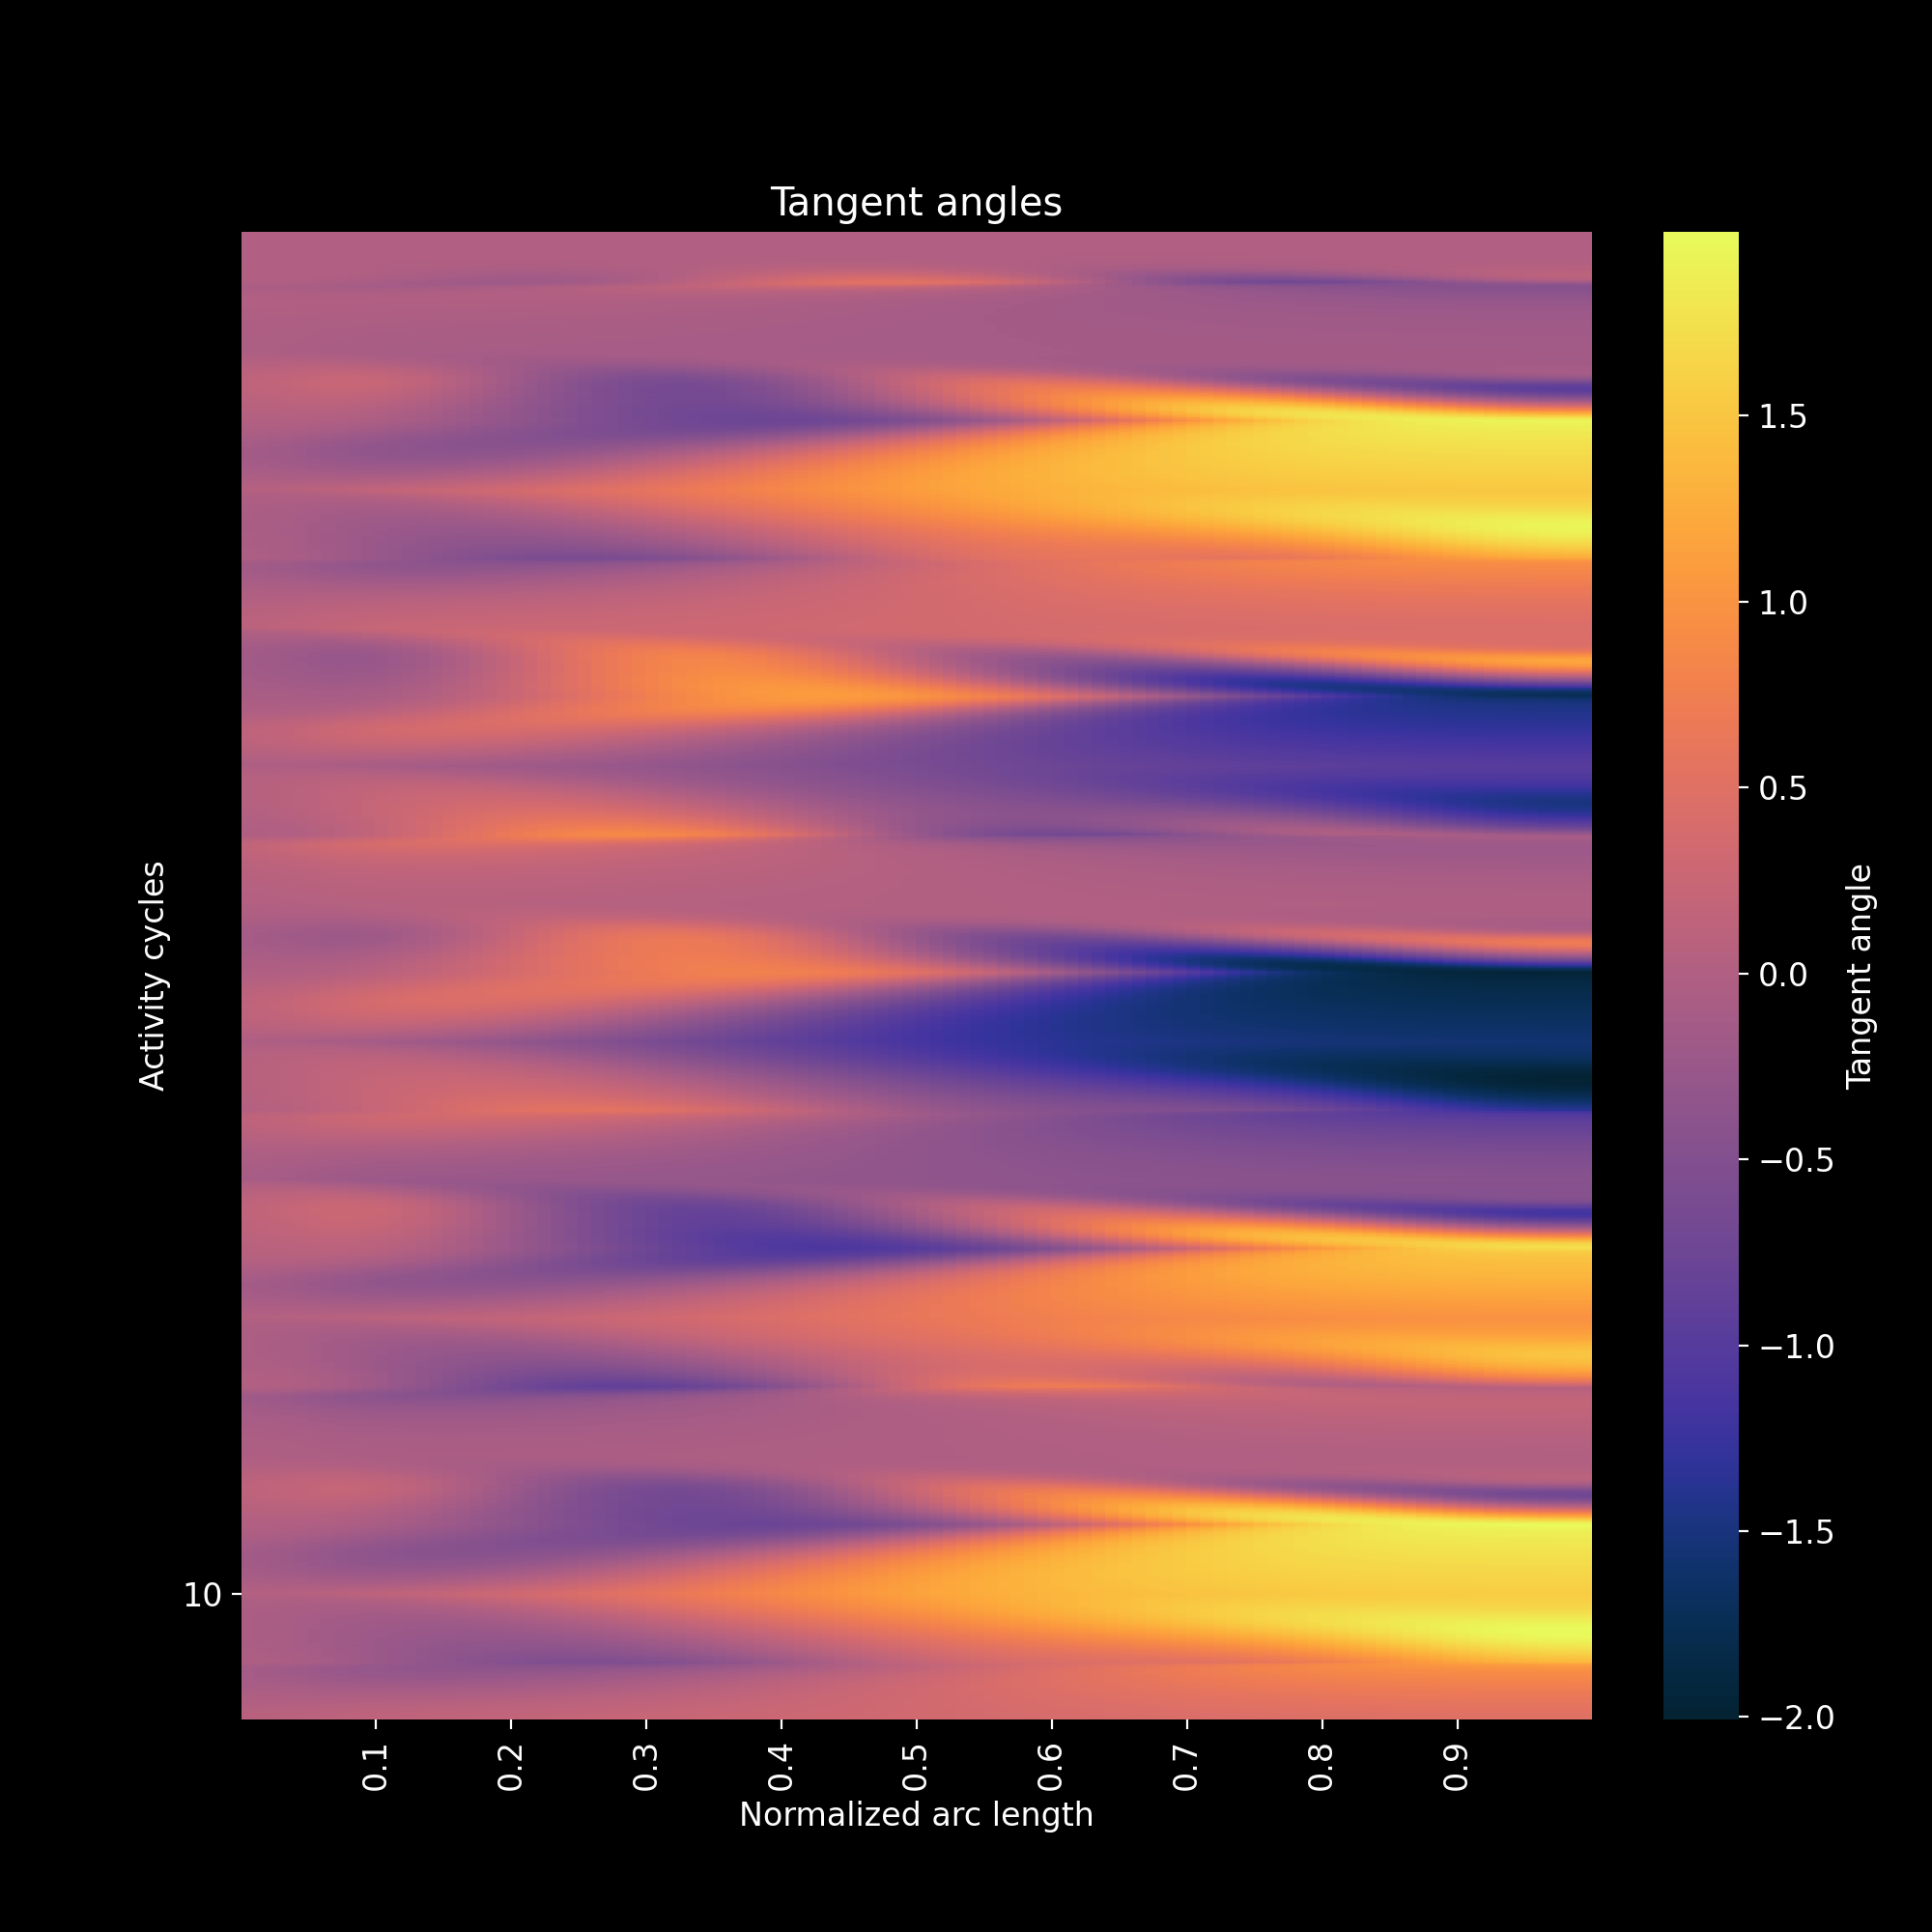

In [248]:
# Plot the tangent angle matrix
filament.plot_tangent_angle_matrix(save = False)

<IPython.core.display.Javascript object>


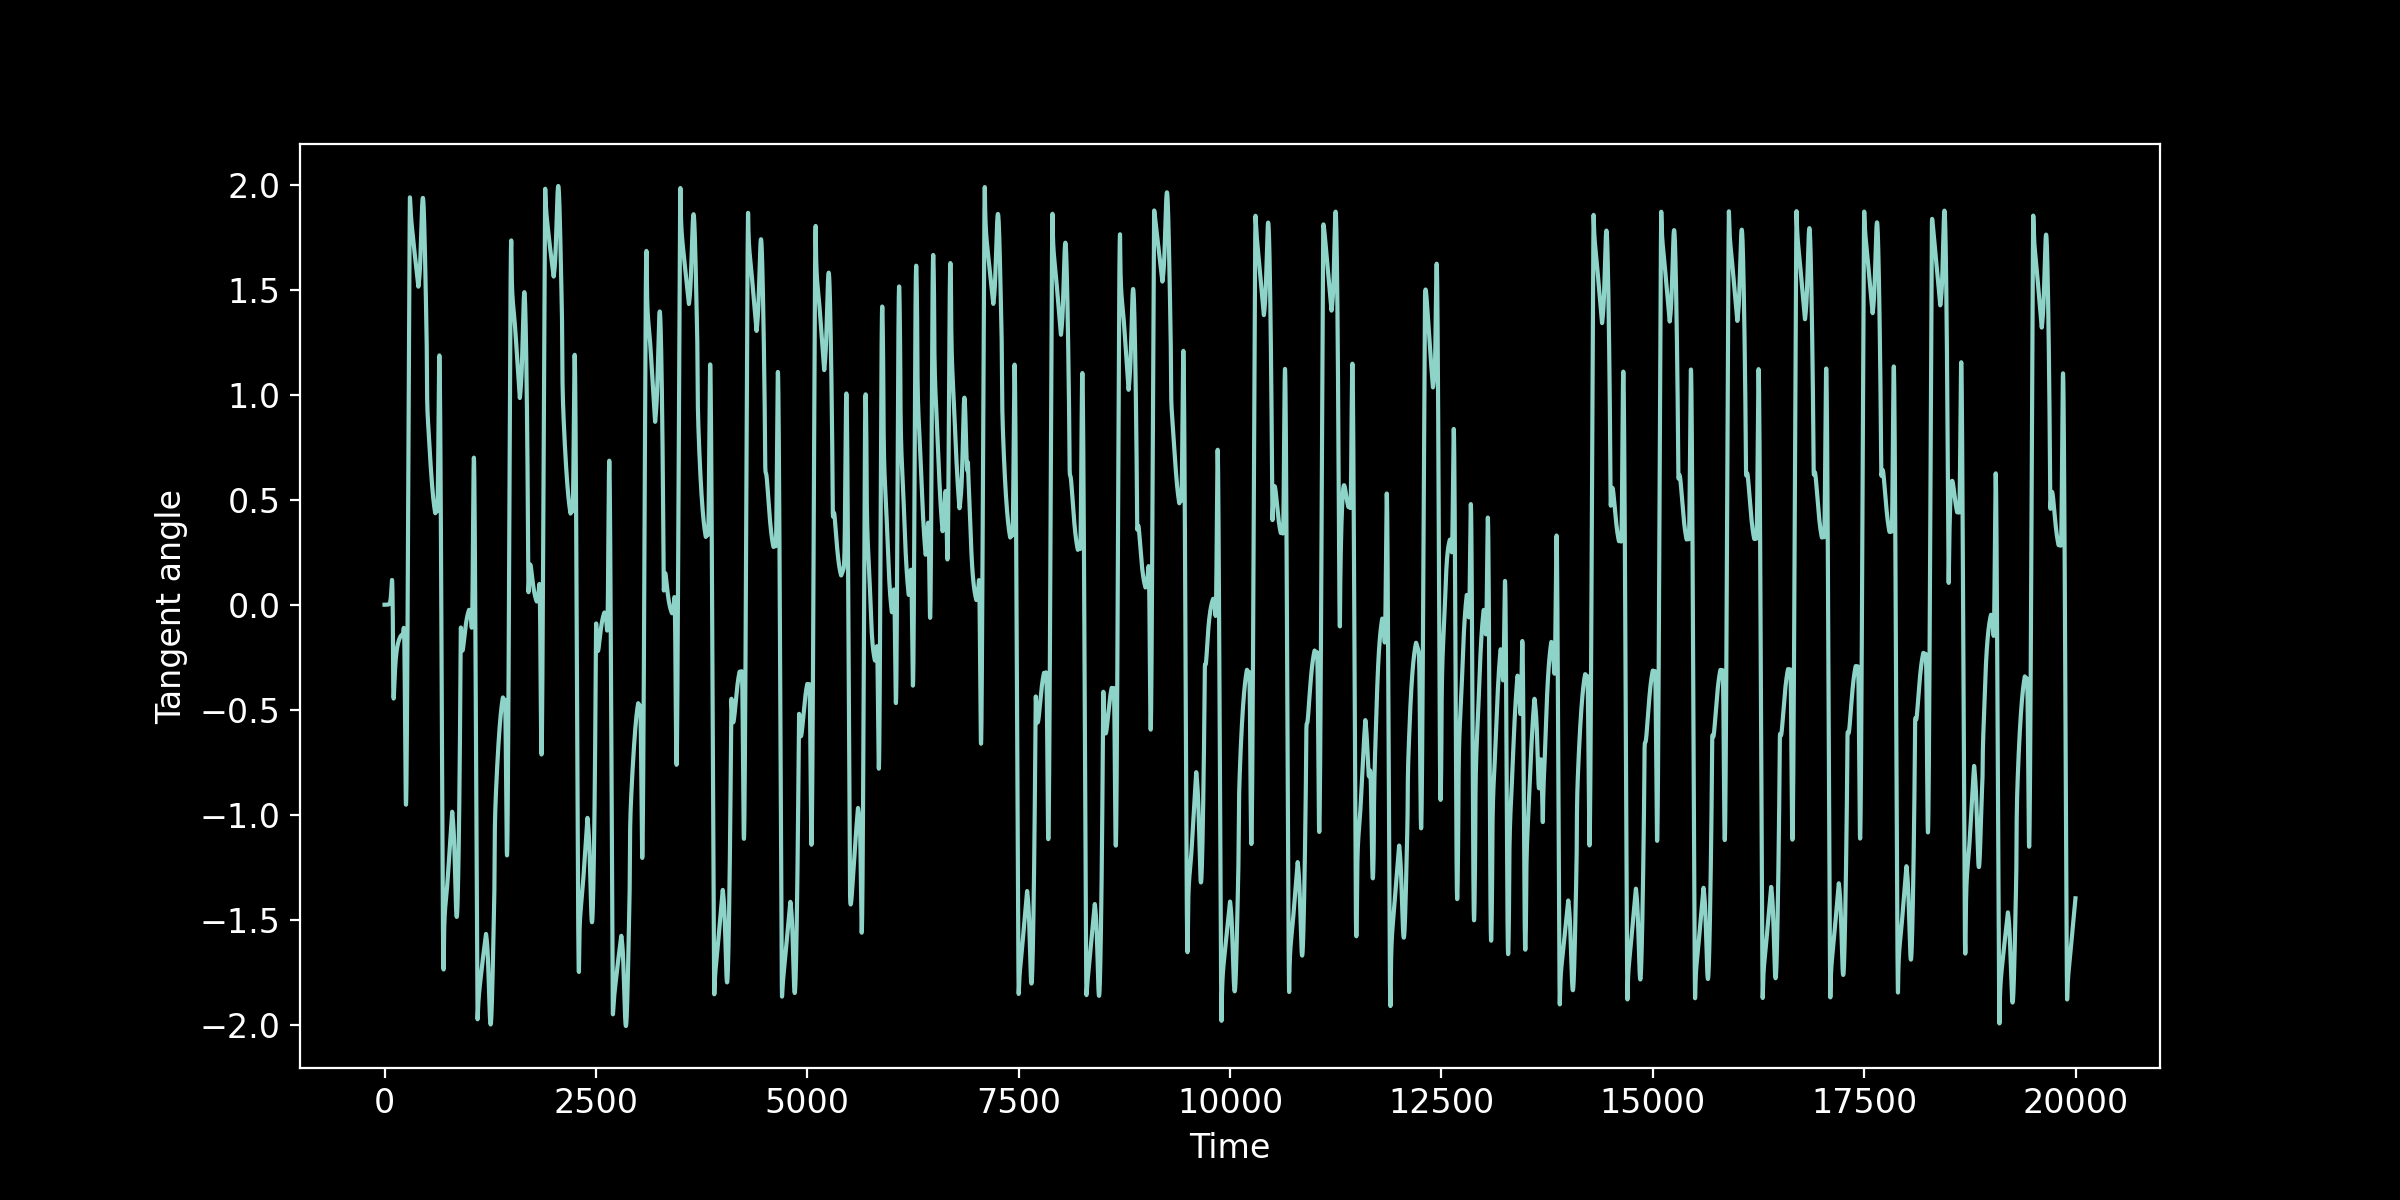

In [190]:
# Plot the tangent angle of the filament tip over time
time_array = range(int(filament.Nt/5))
plt.figure(figsize = (12,6))
plt.plot(filament.tangent_angles_matrix[:, -1])
plt.xlabel('Time')
plt.ylabel('Tangent angle')
# plt.savefig(filament.dataName +'TangentAngle_At_Tip.png', dpi = 300)
plt.show()